# Task 1: Dataset Identification and EDA

### We are trying to research on early detection of Type 2 diabetes.

The Dataset to be used is: 
**Pima 
Indians dataset from the National Institute of Diabetes and 
Digestive and Kidney Diseas**es

Patients in the dataset to be included need to have:

**Age >= 21**

**Sex = Female**

**Heritage = Pima Indian Heritage**

There are **8 Predictor Variables (Inputs)** for which we have 
**1 Target Variable (Output)**, whether patient is diagnosed with Type 2 diabetes or not

&nbsp;

In [2]:
install.packages("readxl")
library(readxl)

Installing package into 'C:/Users/kanda/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kanda\AppData\Local\Temp\Rtmpe6lKM4\downloaded_packages


Warning message:
"package 'readxl' was built under R version 4.4.3"


In [3]:
# Reading the file to import the database

data <- read.csv("C:/Users/kanda/OneDrive/Desktop/Coding/Semester 4/Data Exploration for AI/Assignments/Group Assignment/diabetes.csv")
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


0 = Healthy ; 1 = Diagnosed with Type 2 diabetes

In [5]:
# Filtering the data:

filtered_data <- subset(data, Age >= 21)
head(filtered_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [7]:
nrow (data)

[1] 768

In [9]:
nrow(filtered_data)

[1] 768


#### The purpose of Exploratory Data Analysis is to understand the Data and apply required editing, manipulations and preprocessing to the data for Machine Learning and Statistical Modelling

As a part of Data Exploration and Analysis, we shall firstly clean the data before any other analysis

Data Cleaning includes tasks like:

    1. Handling missing values
    2. Removing Duplicate data
    3. Imputing data values etc.

&nbsp;
#### Checking the structure of the data:

In [11]:
print(str(filtered_data))

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...
NULL


In [13]:
print(summary(filtered_data))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [15]:
print(names(data))

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


&nbsp;

#### Checking for the Missing Values

We will be imputing the missing values in the different predictor attributes with their respective medians, since medians are more robust as comapred to the means

In 5 attributes:

    1. Glucose

    2. Blood Pressure

    3. SkinThickness

    4. Insulin

    5. BMI

0 values signify nothing but missing values and hence they shall first be converted to Null values (NA) and then inputation will be done to them

In [17]:
# For the 5 columns listed above

# Step 1: Columns where 0 = missing
zero_cols <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")

# Step 2: Replacing 0 with NA
filtered_data[, zero_cols] <- lapply(filtered_data[, zero_cols], function(x) ifelse(x == 0, NA, x))

# Step 3: Imputing NA values using column medians
for (col in zero_cols) {
  filtered_data[[col]][is.na(filtered_data[[col]])] <- median(filtered_data[[col]], na.rm = TRUE)
}                                    

In [19]:
# For the remaining 3 columns as well, we shall apply imputation

# Optional: Imputing any remaining NAs in the remaining columns
filtered_data <- data.frame(lapply(filtered_data, function(x) {
  if (is.numeric(x)) {
    x[is.na(x)] <- median(x, na.rm = TRUE)
  }
  return(x)
}))

In [21]:
head(filtered_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,148,72,35,125,33.6,0.627,50,1
2,1,85,66,29,125,26.6,0.351,31,0
3,8,183,64,29,125,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,29,125,25.6,0.201,30,0


&nbsp;

#### Removing the Duplicate rows 

In [23]:
sum(duplicated(filtered_data))  # helps to find the total number of duplicate rows

[1] 0

Thereby, there is no need to remove any duplicate rows, since there no duplicated rows

&nbsp;
#### Converting the Outcome column into a factor for easier classification 

In [25]:
filtered_data$Outcome <- as.factor(filtered_data$Outcome)  # Convert target variable to factor

In [27]:
filtered_data$Outcome

[1] 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 [38] 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 [75] 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
[112] 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[149] 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
[186] 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
[223] 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
[260] 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
[297] 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
[334] 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
[371] 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
[408] 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
[445] 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
[482] 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0
[519] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0
[556] 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0
[593] 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
[630] 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0
[667] 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1
[704] 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1
[741] 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0
Levels: 0 1


#### The Data Cleaning portion has been completed
&nbsp;

#### For the analysis of the Dataset after cleaning:

There are two types of analysis:

### 1. Univariate Analysis
### 2. Bivariate Analysis

&nbsp;
#### UNIVARIATE ANALYSIS

In Univariate Analysis we understand the distribution and behaviour of each individual column

In [29]:
# Summary Statistics
print(summary(filtered_data$Pregnancies))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   3.845   6.000  17.000 


In [31]:
print(summary(filtered_data$Glucose))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.00   99.75  117.00  121.66  140.25  199.00 


In [33]:
print(summary(filtered_data$BloodPressure))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   64.00   72.00   72.39   80.00  122.00 


In [35]:
print(summary(filtered_data$SkinThickness))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   25.00   29.00   29.11   32.00   99.00 


In [37]:
print(summary(filtered_data$Insulin))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   14.0   121.5   125.0   140.7   127.2   846.0 


In [39]:
print(summary(filtered_data$BMI))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.20   27.50   32.30   32.46   36.60   67.10 


In [41]:
print(summary(filtered_data$DiabetesPedigreeFunction))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0780  0.2437  0.3725  0.4719  0.6262  2.4200 


In [43]:
print(summary(filtered_data$Age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   24.00   29.00   33.24   41.00   81.00 


&nbsp;

#### MULITVARIATE ANALYSIS 

In Multivariate Analysis, we understand the Relationships between Variables

In [49]:
# Correlation Matrix 
cor(filtered_data[, sapply(filtered_data, is.numeric)])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00000000,0.1282130,0.208615412,0.08176982,0.02504748,0.02155873,-0.033522673,0.54434123
Glucose,0.12821296,1.0000000,0.218937186,0.19261490,0.41945051,0.23104855,0.137326919,0.26690916
BloodPressure,0.20861541,0.2189372,1.000000000,0.19189239,0.04536330,0.28125656,-0.002378336,0.32491539
SkinThickness,0.08176982,0.1926149,0.191892388,1.00000000,0.15561028,0.54320507,0.102188267,0.12610719
Insulin,0.02504748,0.4194505,0.045363305,0.15561028,1.00000000,0.18024114,0.126503086,0.09710125
BMI,0.02155873,0.2310486,0.281256564,0.54320507,0.18024114,1.00000000,0.153437673,0.02559691
DiabetesPedigreeFunction,-0.03352267,0.1373269,-0.002378336,0.10218827,0.12650309,0.15343767,1.000000000,0.03356131
Age,0.54434123,0.2669092,0.324915391,0.12610719,0.09710125,0.02559691,0.033561312,1.00000000


In [51]:
# Heatmap
install.packages("ggcorrplot")  # Run this only once
library(ggcorrplot)

Installing package into 'C:/Users/kanda/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kanda\AppData\Local\Temp\Rtmpe6lKM4\downloaded_packages


Warning message:
"package 'ggcorrplot' was built under R version 4.4.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.4.3"


In [54]:
# Since Outcome was converted to a factor, converting it back temporarily
filtered_data$Outcome <- as.numeric(as.character(filtered_data$Outcome))

In [64]:
# Creating correlation matrix using absolute values
cor_matrix <- abs(cor(filtered_data_numeric[, sapply(filtered_data_numeric, is.numeric)]))

In [72]:
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.1282130,0.208615412,0.08176982,0.02504748,0.02155873,-0.033522673,0.54434123,0.2218982
Glucose,0.12821296,1.0000000,0.218937186,0.19261490,0.41945051,0.23104855,0.137326919,0.26690916,0.4927824
BloodPressure,0.20861541,0.2189372,1.000000000,0.19189239,0.04536330,0.28125656,-0.002378336,0.32491539,0.1657229
SkinThickness,0.08176982,0.1926149,0.191892388,1.00000000,0.15561028,0.54320507,0.102188267,0.12610719,0.2148732
Insulin,0.02504748,0.4194505,0.045363305,0.15561028,1.00000000,0.18024114,0.126503086,0.09710125,0.2037903
BMI,0.02155873,0.2310486,0.281256564,0.54320507,0.18024114,1.00000000,0.153437673,0.02559691,0.3120383
DiabetesPedigreeFunction,-0.03352267,0.1373269,-0.002378336,0.10218827,0.12650309,0.15343767,1.000000000,0.03356131,0.1738441
Age,0.54434123,0.2669092,0.324915391,0.12610719,0.09710125,0.02559691,0.033561312,1.00000000,0.2383560
Outcome,0.22189815,0.4927824,0.165722913,0.21487322,0.20379034,0.31203834,0.173844066,0.23835598,1.0000000


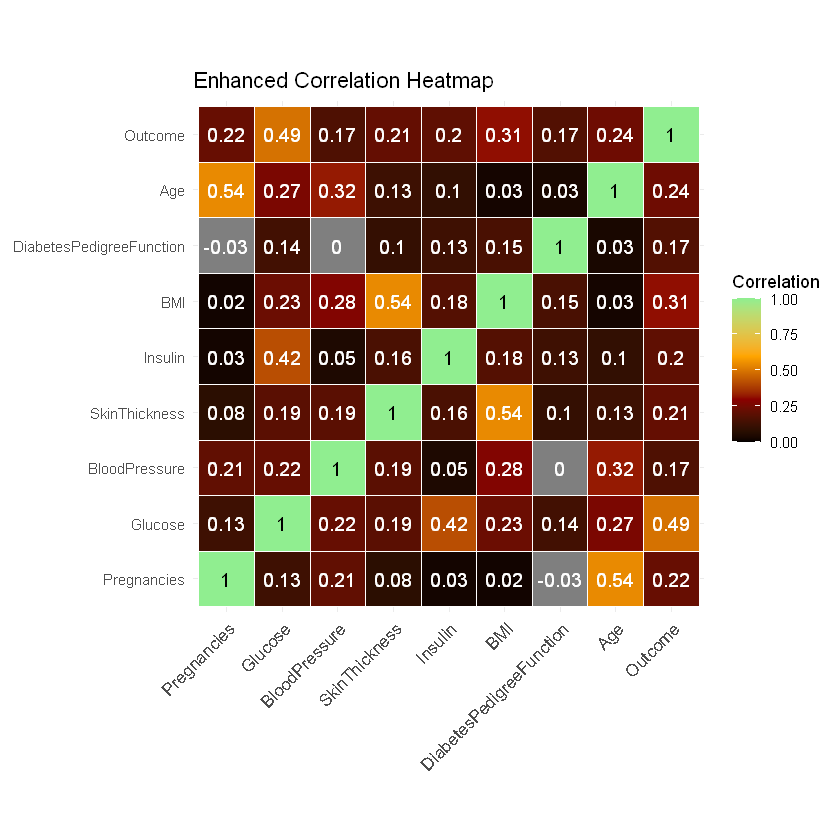

In [78]:
library(ggplot2)
library(reshape2)
library(dplyr)

# Step 1: Convert Outcome to numeric for correlation
filtered_data_numeric <- filtered_data
filtered_data_numeric$Outcome <- as.numeric(as.character(filtered_data$Outcome))

# Step 2: Create correlation matrix
cor_matrix <- cor(filtered_data_numeric[, sapply(filtered_data_numeric, is.numeric)])

# Step 3: Melt to long format
melted_cor <- melt(cor_matrix)

# Step 4: Create label and text color column
melted_cor <- melted_cor %>%
  mutate(label = round(value, 2),
         is_diag = ifelse(Var1 == Var2, TRUE, FALSE),
         text_color = ifelse(abs(value) > 0.7, "black", "white"))

# Step 5: Heatmap with custom gradient and light green diagonals
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = label, color = text_color), size = 4) +
  scale_fill_gradientn(
    colors = c("black", "darkred", "orange", "lightgreen"),  # custom palette
    values = scales::rescale(c(0, 0.3, 0.6, 1)),              # smooth transition
    limits = c(0, 1),
    name = "Correlation"
  ) +
  scale_color_identity() +  # use provided colors
  coord_fixed() +
  labs(title = "Enhanced Correlation Heatmap", x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1))
